# Indice
1. [Clasificación por partido político](#m1)
2. [Clasificación por sexo](#m2)
3. [Clasificación por equipo de futbol](#m3)


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

<a id='m1'></a>
# Clasificación por partido político

In [2]:
Xdf_p = pd.io.parsers.read_csv("matriz_politica.csv", header=None)
ydf_p = pd.io.parsers.read_csv("y_politica.csv", header=None)
X_p = Xdf_p.as_matrix()
y_p = ydf_p.as_matrix()

Para el caso de los partidos políticos tengo 3094 ejemplos de diferentes partidos:

In [3]:
ydf_p.tail()

,0
3089,PI
3090,PN
3091,FA
3092,PN
3093,FA


Repartidos de la siguiente manera:

In [4]:
ydf_p[0].value_counts()

FA    1528
PN     764
PI     426
PC     376
Name: 0, dtype: int64

Para este caso consideré 3939 features. Son la unión de las 2000 cuentas seguidas más comunes por los usuarios de cada partido.

Al algoritmo le voy a dar para cada ejemplo si este sigue o no cada una de estas features.

In [5]:
Xdf_p.tail()

,0,1,2,3,4,5,6,7,8,9,...,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938
3089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3090,0,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3091,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3093,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Con todos los datos disponibles, hago una búsqueda "gruesa" para el parámetro de regularización C entre 1e-5 y 1e5 con una 3-fold cross validation:

In [6]:
Cs = np.logspace(-5,5, 20)
clf_p = GridSearchCV(LogisticRegression(class_weight='balanced'), dict(C=Cs), cv=3,n_jobs=2)
clf_p.fit(X_p, y_p[:,0])
for params, mean_score, scores in clf_p.grid_scores_:
    print("%0.3f (+/-%0.03f) para %r"% (mean_score, scores.std() * 2, params))

0.572 (+/-0.051) para {'C': 1.0000000000000001e-05}
0.597 (+/-0.055) para {'C': 3.3598182862837813e-05}
0.648 (+/-0.041) para {'C': 0.00011288378916846884}
0.687 (+/-0.021) para {'C': 0.00037926901907322499}
0.736 (+/-0.018) para {'C': 0.0012742749857031334}
0.766 (+/-0.022) para {'C': 0.0042813323987193914}
0.779 (+/-0.011) para {'C': 0.01438449888287663}
0.793 (+/-0.016) para {'C': 0.048329302385717518}
0.792 (+/-0.017) para {'C': 0.16237767391887209}
0.786 (+/-0.019) para {'C': 0.54555947811685146}
0.779 (+/-0.020) para {'C': 1.8329807108324339}
0.774 (+/-0.024) para {'C': 6.1584821106602545}
0.768 (+/-0.029) para {'C': 20.691380811147901}
0.763 (+/-0.025) para {'C': 69.519279617756055}
0.760 (+/-0.023) para {'C': 233.57214690901213}
0.759 (+/-0.026) para {'C': 784.75997035146065}
0.756 (+/-0.025) para {'C': 2636.6508987303555}
0.756 (+/-0.028) para {'C': 8858.6679041008319}
0.755 (+/-0.027) para {'C': 29763.51441631313}
0.755 (+/-0.026) para {'C': 100000.0}


Como los mejores valores se encuentran entre 1e-3 y 1.8 hago una búsqueda más "fina" en este rango usando una 5-fold cross validation.

Mejor C: 0.106


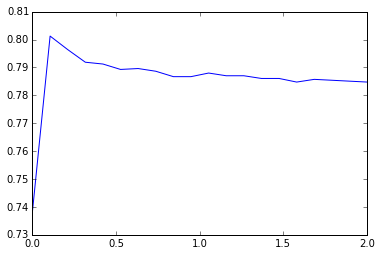

In [7]:
Cs = np.linspace(1e-3,2, 20)
clf_p = GridSearchCV(LogisticRegression(class_weight='balanced'), dict(C=Cs), cv=5,n_jobs=2)
clf_p.fit(X_p, y_p[:,0])

scores = [x[1] for x in clf_p.grid_scores_]
plt.plot(Cs, scores, label='C: ' + str(params))

print("Mejor C: %0.3f"% clf_p.best_params_["C"])

El mejor valor de C está en 0.1

Parto el conjunto de datos en dos: entrenamiento y test (0.8 entrenamiento, 0.2 test)

Entreno con el conjunto de entrenamiento y evaluo contra test:

In [8]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_p, y_p, test_size=0.2, random_state=None)
clf_p = LogisticRegression(C=0.1,class_weight='balanced')
clf_p.fit(X_train, y_train[:,0])

print classification_report(y_test[:,0], clf_p.predict(X_test))
print confusion_matrix(y_test[:,0], clf_p.predict(X_test), clf_p.classes_)
print "Score: %0.3f" % clf_p.score(X_test, y_test[:,0])

             precision    recall  f1-score   support

         FA       0.86      0.89      0.87       316
         PC       0.88      0.73      0.80        71
         PI       0.59      0.62      0.60        84
         PN       0.79      0.79      0.79       148

avg / total       0.81      0.81      0.81       619

[[280   1  18  17]
 [  8  52   6   5]
 [ 18   5  52   9]
 [ 18   1  12 117]]
Score: 0.809


La precisión final esta en el entorno de 0.8. 

Para el caso del partido independiente tanto la precision y el recall no es buena (muchos falsos positivos y falsos negativos). Supongo que se da porque es el tipo de cuenta que mas se puede "confundir" con la de otros partidos.

<a id='m2'></a>
# Clasificación por sexo

In [9]:
ydf_s = pd.io.parsers.read_csv("y_sexo.csv", header=None)
Xdf_s = pd.io.parsers.read_csv("matriz_sexo.csv", header=None)
X_s = Xdf_s.as_matrix()
y_s = ydf_s.as_matrix()

Para este caso tengo 16943 ejemplos:

In [10]:
ydf_s.tail()

,0
16938,M
16939,M
16940,M
16941,M
16942,M


Repartidos de la siguiente manera:

In [11]:
ydf_s[0].value_counts()

M    9999
F    6944
Name: 0, dtype: int64

Para este caso consideré 3992 features. Son la unión de las 3000 cuentas seguidas más comunes por los usuarios de cada sexo.

Al algoritmo le voy a dar para cada ejemplo si este sigue o no cada una de estas features.

In [12]:
Xdf_s.tail()

,0,1,2,3,4,5,6,7,8,9,...,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991
16938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16940,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Con todos los datos disponibles, hago una busqueda "gruesa" para el parametro de regularizacion C entre 1e-5 y 1e5 con una 3-fold cross validation:

In [13]:
Cs = np.logspace(-5,5, 20)
clf_s = GridSearchCV(LogisticRegression(class_weight='balanced'), dict(C=Cs), cv=3,n_jobs=2)
clf_s.fit(X_s, y_s[:,0])
for params, mean_score, scores in clf_s.grid_scores_:
    print("%0.3f (+/-%0.03f) para %r"% (mean_score, scores.std() * 2, params))

0.744 (+/-0.017) para {'C': 1.0000000000000001e-05}
0.754 (+/-0.024) para {'C': 3.3598182862837813e-05}
0.767 (+/-0.032) para {'C': 0.00011288378916846884}
0.785 (+/-0.039) para {'C': 0.00037926901907322499}
0.803 (+/-0.052) para {'C': 0.0012742749857031334}
0.815 (+/-0.057) para {'C': 0.0042813323987193914}
0.821 (+/-0.059) para {'C': 0.01438449888287663}
0.816 (+/-0.063) para {'C': 0.048329302385717518}
0.804 (+/-0.065) para {'C': 0.16237767391887209}
0.787 (+/-0.061) para {'C': 0.54555947811685146}
0.773 (+/-0.057) para {'C': 1.8329807108324339}
0.759 (+/-0.058) para {'C': 6.1584821106602545}
0.753 (+/-0.055) para {'C': 20.691380811147901}
0.749 (+/-0.050) para {'C': 69.519279617756055}
0.746 (+/-0.050) para {'C': 233.57214690901213}
0.746 (+/-0.049) para {'C': 784.75997035146065}
0.746 (+/-0.050) para {'C': 2636.6508987303555}
0.745 (+/-0.051) para {'C': 8858.6679041008319}
0.744 (+/-0.050) para {'C': 29763.51441631313}
0.744 (+/-0.051) para {'C': 100000.0}


Como los mejores valores se encuentran entre 4e-3 y 0.5 hago una busqueda mas fina en este rango.

Mejor C: 0.030


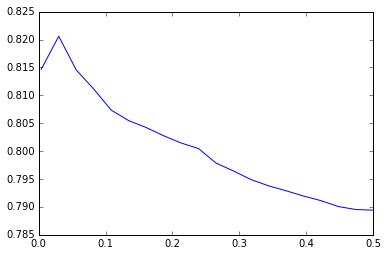

In [18]:
Cs = np.linspace(4e-3,0.5, 20)
clf_s = GridSearchCV(LogisticRegression(class_weight='balanced'), dict(C=Cs), cv=3,n_jobs=2)
clf_s.fit(X_s, y_s[:,0])

scores = [x[1] for x in clf_s.grid_scores_]
plt.plot(Cs, scores, label='C: ' + str(params))

print("Mejor C: %0.3f"% clf_s.best_params_["C"])

El mejor valor de C está en 0.03

Parto el conjunto de datos en dos: entrenamiento y test (0.8 entrenamiento, 0.2 test)

Entreno con el conjunto de entrenamiento y evaluo contra test:

In [19]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_s, y_s, test_size=0.2, random_state=None)
clf_s = LogisticRegression(C=0.03,class_weight='balanced')
clf_s.fit(X_train, y_train[:,0])

print classification_report(y_test[:,0], clf_s.predict(X_test))
print confusion_matrix(y_test[:,0], clf_s.predict(X_test), clf_s.classes_)
print "Score: %0.3f" % clf_s.score(X_test, y_test[:,0])

             precision    recall  f1-score   support

          F       0.80      0.82      0.81      1439
          M       0.86      0.85      0.86      1950

avg / total       0.84      0.84      0.84      3389

[[1176  263]
 [ 287 1663]]
Score: 0.838


La precisión final está en el entorno de 0.80 y 0.85.

<a id='m3'></a>
# Clasificación por equipo de futbol

In [20]:
ydf_f = pd.io.parsers.read_csv("y_futbol.csv", header=None)
Xdf_f = pd.io.parsers.read_csv("matriz_futbol.csv", header=None)
X_f = Xdf_f.as_matrix()
y_f = ydf_f.as_matrix()

Para el caso de los partidos politicos tengo 2622 cuentas de diferentes partidos:

In [21]:
ydf_f.tail()

,0
4714,DAN
4715,DAN
4716,DAN
4717,DAN
4718,DAN


Repartidas de la siguiente manera:

In [22]:
ydf_f[0].value_counts()

PEN    1542
NAC    1510
DAN     491
DEF     476
WAN     391
CER     297
CL       12
Name: 0, dtype: int64

Para este caso considere 1379 features. Son la unión de las 500 cuentas seguidas más comunes por los usuarios de cada equipo. 

In [23]:
Xdf_f.tail()

,0,1,2,3,4,5,6,7,8,9,...,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378
4714,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Con todos los datos disponibles, hago una busqueda "gruesa" para el parametro de regularizacion C entre 1e-5 y 1e5 con una 3-fold cross validation:

In [24]:
Cs = np.logspace(-5,5, 20)
clf_f = GridSearchCV(LogisticRegression(class_weight='balanced'), dict(C=Cs), cv=3,n_jobs=2)
clf_f.fit(X_f, y_f[:,0])
for params, mean_score, scores in clf_f.grid_scores_:
    print("%0.3f (+/-%0.03f) para %r"% (mean_score, scores.std() * 2, params))

0.637 (+/-0.081) para {'C': 1.0000000000000001e-05}
0.669 (+/-0.066) para {'C': 3.3598182862837813e-05}
0.733 (+/-0.053) para {'C': 0.00011288378916846884}
0.828 (+/-0.064) para {'C': 0.00037926901907322499}
0.912 (+/-0.043) para {'C': 0.0012742749857031334}
0.964 (+/-0.036) para {'C': 0.0042813323987193914}
0.987 (+/-0.015) para {'C': 0.01438449888287663}
0.989 (+/-0.010) para {'C': 0.048329302385717518}
0.990 (+/-0.008) para {'C': 0.16237767391887209}
0.990 (+/-0.008) para {'C': 0.54555947811685146}
0.990 (+/-0.007) para {'C': 1.8329807108324339}
0.990 (+/-0.008) para {'C': 6.1584821106602545}
0.990 (+/-0.008) para {'C': 20.691380811147901}
0.990 (+/-0.007) para {'C': 69.519279617756055}
0.990 (+/-0.008) para {'C': 233.57214690901213}
0.990 (+/-0.007) para {'C': 784.75997035146065}
0.990 (+/-0.008) para {'C': 2636.6508987303555}
0.990 (+/-0.008) para {'C': 8858.6679041008319}
0.990 (+/-0.008) para {'C': 29763.51441631313}
0.990 (+/-0.008) para {'C': 100000.0}


Los mejores valores se encuentran despues de 1e-2. 

En este caso los valores son MUY buenos porque dentro de las features estan consideradas las cuentas oficiales de los equipos y estas condicionan fuertemente los resultados. 

Hago una busqueda mas fina en el rango 1e-2 a 0.5.

Mejor C: 0.036


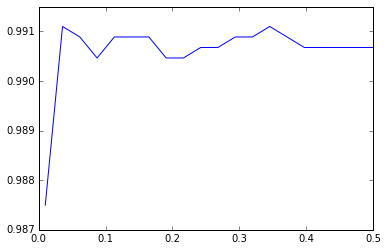

In [25]:
Cs = np.linspace(1e-2,0.5, 20)
clf_f = GridSearchCV(LogisticRegression(class_weight='balanced'), dict(C=Cs), cv=5,n_jobs=2)
clf_f.fit(X_f, y_f[:,0])

scores = [x[1] for x in clf_f.grid_scores_]
plt.plot(Cs, scores, label='C: ' + str(params))

print("Mejor C: %0.3f"% clf_f.best_params_["C"])

El mejor valor de C esta en 0.03

Parto el conjunto de datos en dos: entrenamiento y test (0.8 entrenamiento, 0.2 test)

Entreno con el conjunto de entrenamiento y evaluo contra test:

In [28]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_f, y_f, test_size=0.2, random_state=None)
clf_f = LogisticRegression(C=0.3,class_weight='balanced')
clf_f.fit(X_train, y_train[:,0])

print classification_report(y_test[:,0], clf_f.predict(X_test))
print confusion_matrix(y_test[:,0], clf_f.predict(X_test), clf_f.classes_)
print "Score: %0.3f" % clf_f.score(X_test, y_test[:,0])

             precision    recall  f1-score   support

        CER       1.00      1.00      1.00        58
         CL       1.00      0.50      0.67         2
        DAN       0.99      0.99      0.99        92
        DEF       1.00      1.00      1.00        89
        NAC       1.00      0.99      1.00       307
        PEN       0.99      1.00      1.00       307
        WAN       0.99      1.00      0.99        89

avg / total       0.99      0.99      0.99       944

[[ 58   0   0   0   0   0   0]
 [  0   1   0   0   1   0   0]
 [  0   0  91   0   0   1   0]
 [  0   0   0  89   0   0   0]
 [  0   0   0   0 305   1   1]
 [  0   0   1   0   0 306   0]
 [  0   0   0   0   0   0  89]]
Score: 0.995


La precision final es casi perfecta pero los resultados estan fuertemente condicionados por las cuentas oficiales de los equipos.